# **펭귄 몸무게 예측 경진대회**

1. train.csv : 학습 데이터
id : 샘플 아이디
Species: 펭귄의 종을 나타내는 문자열
Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
Flipper Length (mm) : 펭귄의 팔(날개) 길이
Sex : 펭귄의 성별
Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)


2. test.csv : 테스트 데이터
id : 샘플 아이디
Species: 펭귄의 종을 나타내는 문자열
Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
Flipper Length (mm) : 펭귄의 팔(날개) 길이
Sex : 펭귄의 성별
Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율


3. sample_submissoin.csv : 제출 양식
id : 샘플 아이디
Body Mass (g) : 펭귄의 몸무게를 나타내는 숫자 (g)


데이터 상세 설명
성인 Adélie, Chinstrap 및 Gentoo 펭귄의 둥지 관찰, 펭귄 크기 데이터 및 혈액 샘플의 동위원소 측정을 포함한 데이터입니다.
남극의 Palmer Station 근처 Palmer 군도에 있는 섬에서 관찰된 Adélie, chinstrap, Gentoo 펭귄의 먹이를 찾는 성체의 크기 측정, 클러치 관찰 및 혈액 동위원소 비율. 
데이터는 Kristen Gor man 박사와 Palmer Station Long Term Ecological Research(LTER) 프로그램에 의해 수집되어 제공되었습니다.
출처: https://allisonhorst.github.io/palmerpenguins/




# **데이터 불러오기**

In [22]:
%matplotlib inline 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

train = "https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/%ED%8E%AD%EA%B6%8C_%EB%AA%B8%EB%AC%B4%EA%B2%8C_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/train.csv"
test = "https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/%ED%8E%AD%EA%B6%8C_%EB%AA%B8%EB%AC%B4%EA%B2%8C_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/test.csv"
sub = "https://raw.githubusercontent.com/annsyj94/Data_Science_Contest-/main/%ED%8E%AD%EA%B6%8C_%EB%AA%B8%EB%AC%B4%EA%B2%8C_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C/sample_submission.csv"

df = pd.read_csv(train)
df_2 = pd.read_csv(test)
df_3 = pd.read_csv(sub)

In [ ]:
# train 데이터 읽기 
print(df.shape)
print(df.info())

(114, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    int64  
 2   Island               114 non-null    int64  
 3   Clutch Completion    114 non-null    int64  
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  111 non-null    object 
 8   Delta 15 N (o/oo)    111 non-null    float64
 9   Delta 13 C (o/oo)    111 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 9.9+ KB
None


In [ ]:
df.head(4)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850


# **EDA**

In [ ]:
#종의 수 
df['Species'].value_counts()

Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64

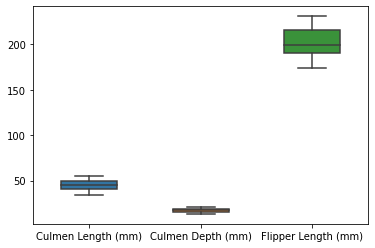

In [ ]:
#Boxplot 

df1 = df[['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)']]
sns.boxplot(data=df1, width=0.5, fliersize=5)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


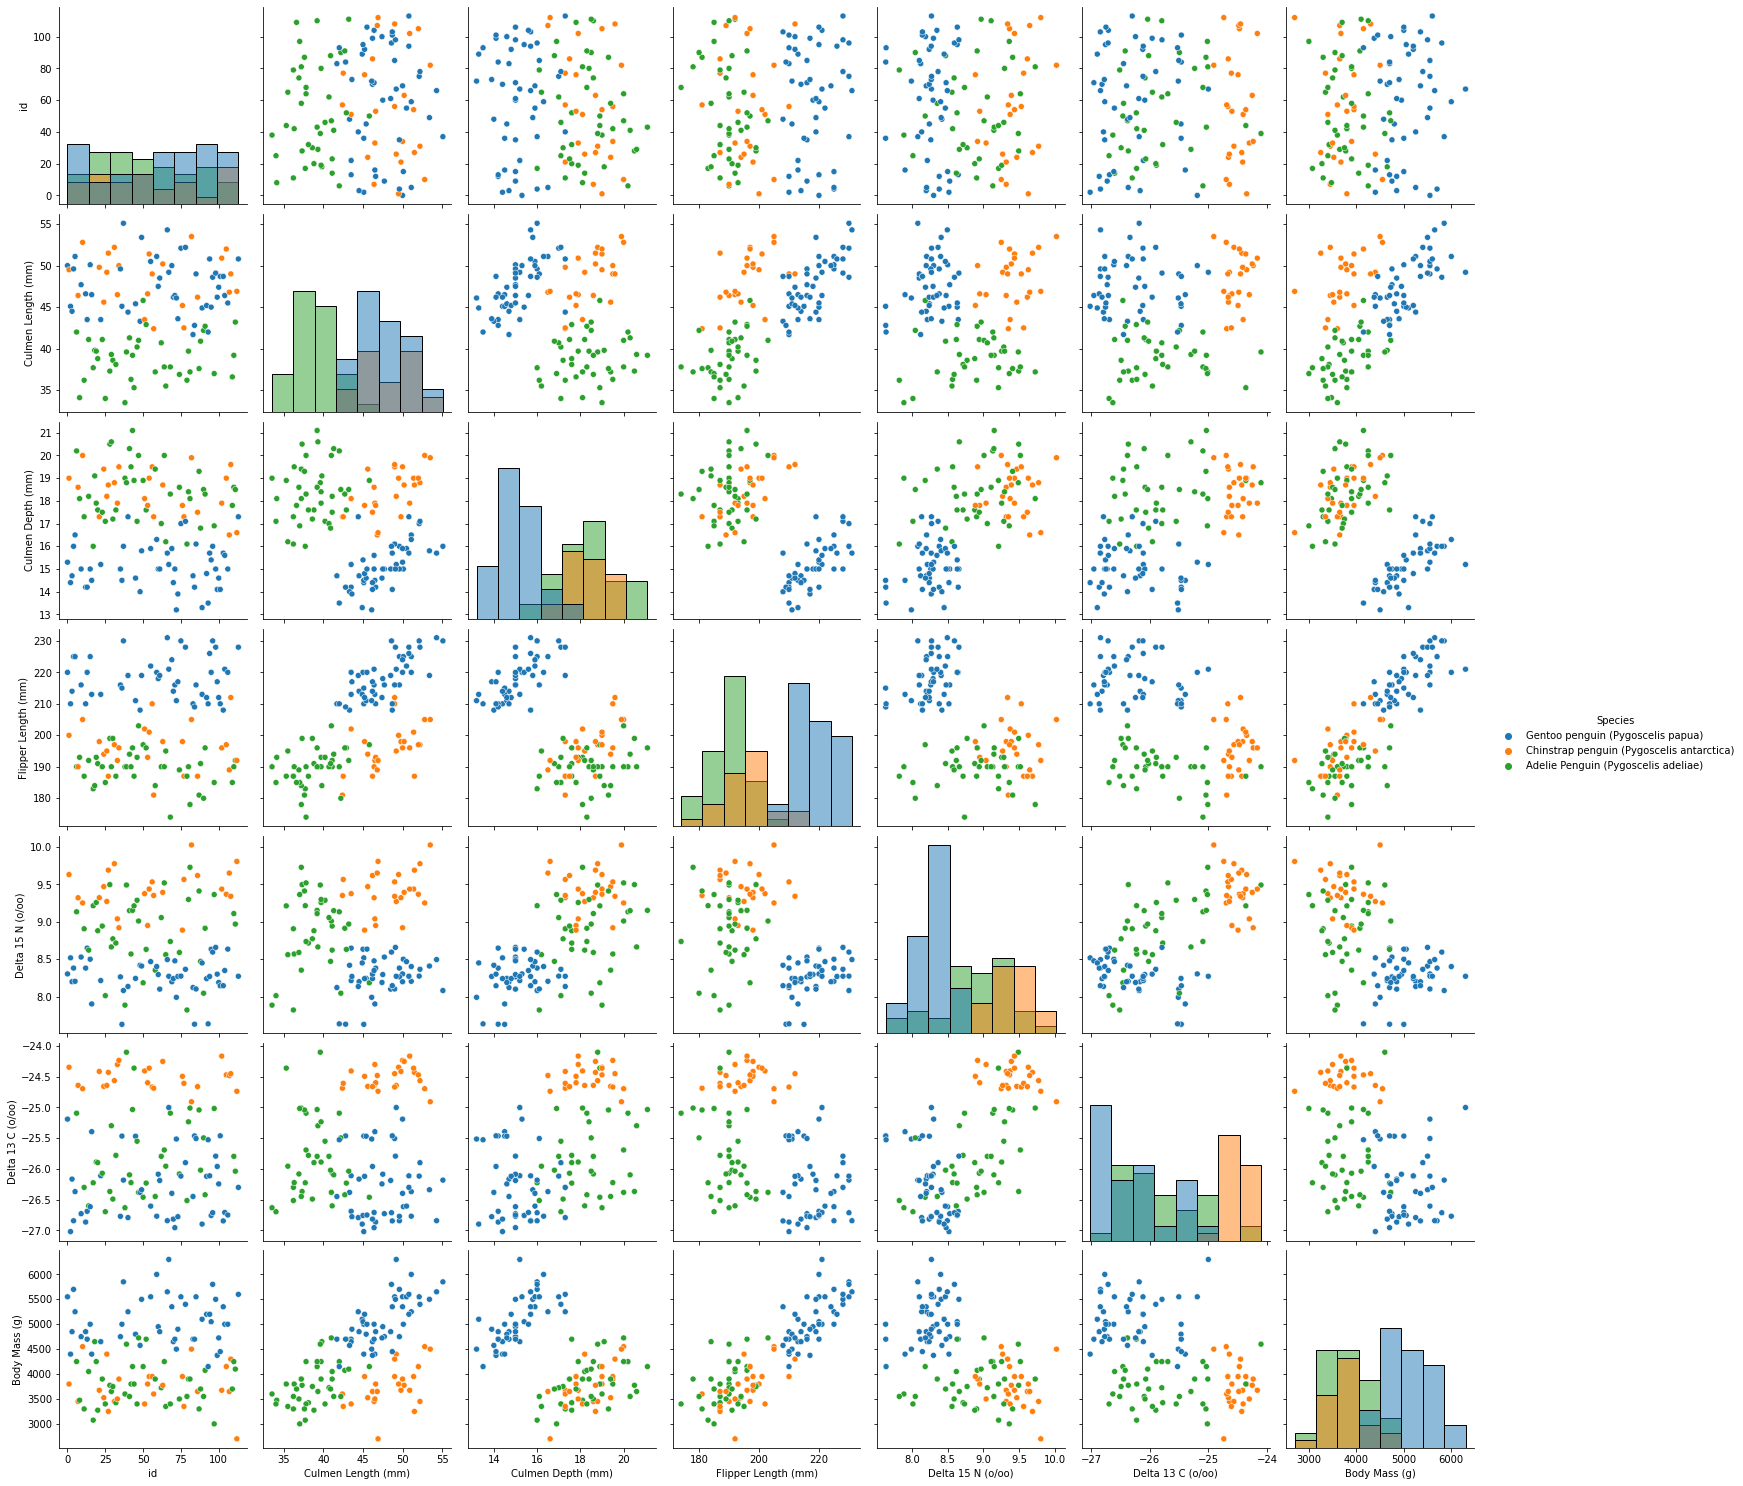

In [ ]:
#Scatterplot 
#산점도는 다른 기능에 대한 상관 관계를 보여줌 
#이 방법은 우리 모델의 분류를 가장 많이 설명하는 중요한 기능을 파악하는 데 도움이 됨 

sns.pairplot(df, hue="Species", size=3,diag_kind="hist")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


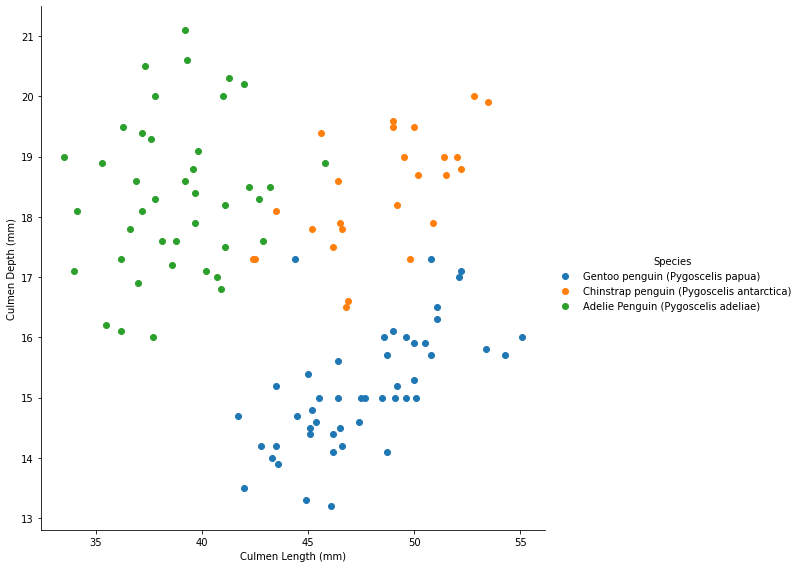

In [ ]:
#Culmen Depth vs culmen length 

cu = sns.FacetGrid(df, hue="Species", size=8) 
cu.map(plt.scatter, "Culmen Length (mm)", "Culmen Depth (mm)") 
cu.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


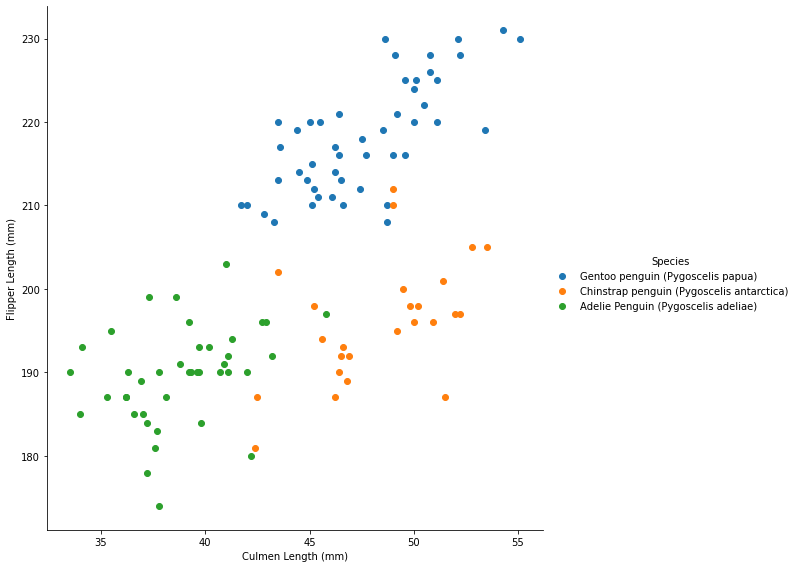

In [ ]:
#Culmen_depth vs flipperlength 

cu2 = sns.FacetGrid(df, hue="Species", size=8) 
cu2.map(plt.scatter, "Culmen Length (mm)", "Flipper Length (mm)") 
cu2.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



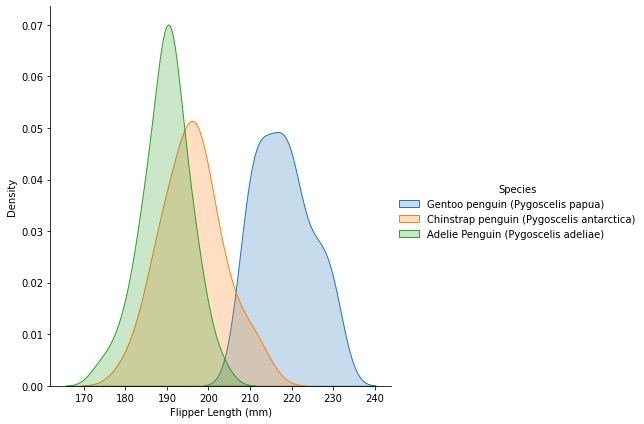

In [ ]:
#KDEPlot

kde = sns.FacetGrid(df, hue="Species", size=6,) 
kde.map(sns.kdeplot, "Flipper Length (mm)",shade=True) 
kde.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



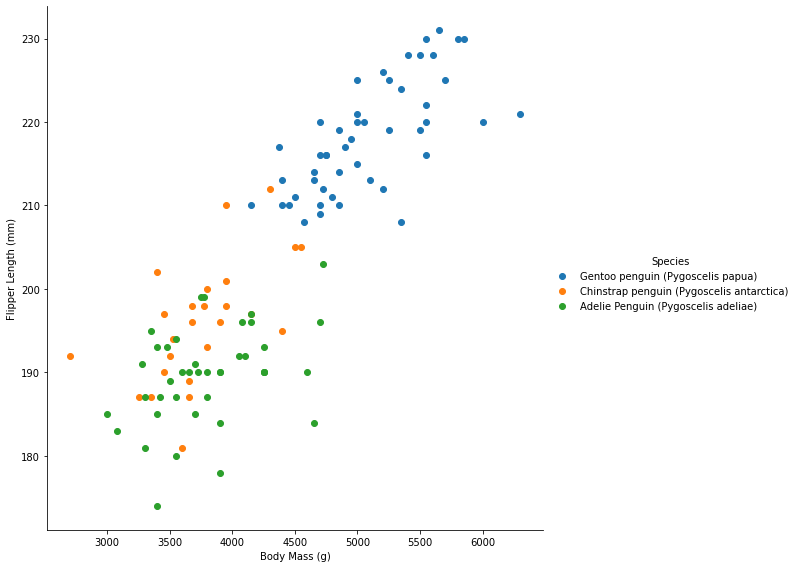

In [ ]:
#Flipper length vs. body mass

cu3 = sns.FacetGrid(df, hue="Species", size=8) 
cu3.map(plt.scatter, "Body Mass (g)", "Flipper Length (mm)")
cu3.add_legend()

# **Modeling**

In [23]:
# 데이터를 수치형으로 바꾸기 
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()

df["Species"] = le.fit_transform(df["Species"])
df["Clutch Completion"] = le.fit_transform(df["Clutch Completion"])
df["Island"] = le.fit_transform(df["Island"])

df.head(5)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,2,0,1,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,1,1,0,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,2,0,1,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,2,0,1,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,2,0,0,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [24]:
df = pd.get_dummies(df, columns = ['Sex'])
df.head(4)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Sex_FEMALE,Sex_MALE
0,0,2,0,1,50.0,15.3,220,8.30515,-25.19017,5550,0,1
1,1,1,1,0,49.5,19.0,200,9.63074,-24.34684,3800,0,1
2,2,2,0,1,45.1,14.4,210,8.51951,-27.01854,4400,1,0
3,3,2,0,1,44.5,14.7,214,8.20106,-26.16524,4850,1,0


In [25]:
y = df['Body Mass (g)']
x = df.drop('Body Mass (g)', axis = 1)

In [26]:
# 용량 줄이기 
x = np.nan_to_num(x)

In [29]:
# train_test_split로 데이터를 나누기 
from sklearn.model_selection import train_test_split 
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(91, 11)
(91,)
(23, 11)
(23,)


In [32]:
lgb = LGBMClassifier(random_state=42)
lgb.fit(x_train,y_train)

print(lgb.score(x_train,y_train))

1.0


In [62]:
# test 데이터를 수치형으로 바꾸기 
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()

df_2["Species"] = le.fit_transform(df_2["Species"])
df_2["Clutch Completion"] = le.fit_transform(df_2["Clutch Completion"])
df_2["Island"] = le.fit_transform(df_2["Island"])

df_2.head(5)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,1,1,1,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,2,0,1,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,0,1,1,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,1,1,1,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,0,0,0,37.9,18.6,172.0,FEMALE,8.38404,-25.19837


In [63]:
df_2 = pd.get_dummies(df_2, columns = ['Sex'])
df_2.head(4)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex_FEMALE,Sex_MALE
0,0,1,1,1,52.0,20.7,210.0,9.43146,-24.68440,0,1
1,1,2,0,1,55.9,17.0,228.0,8.31180,-26.35425,0,1
2,2,0,1,1,38.9,18.8,190.0,8.36936,-26.11199,1,0
3,3,1,1,1,45.2,16.6,191.0,9.62357,-24.78984,1,0


In [64]:
#LGBMClassifier로 예측하기 
lgb.fit(x,y)
print(lgb.score(x,y))

1.0


In [65]:
prediction = lgb.predict(df_2)
prediction

array([3800, 5850, 3450, 3450, 3400, 4550, 4575, 4850, 4850, 3900, 4050,
       4850, 4850, 4725, 5500, 4725, 3950, 3900, 3275, 3275, 4250, 5550,
       5000, 3950, 4400, 4750, 3500, 4650, 4950, 5000, 3550, 4700, 3650,
       4850, 3900, 3400, 4850, 3400, 3900, 4575, 3900, 3800, 4250, 5250,
       3400, 4400, 3400, 4150, 5500, 5800, 3400, 4250, 3800, 3950, 4150,
       3650, 3550, 4050, 4700, 4950, 4300, 3500, 3900, 5550, 3350, 3950,
       4150, 4700, 4250, 3900, 4700, 3350, 3900, 4150, 5550, 4150, 3350,
       3450, 5250, 4700, 3900, 3550, 4700, 4500, 5000, 4150, 4650, 4150,
       3300, 5550, 4700, 3700, 4250, 3700, 3300, 3650, 3400, 3000, 4725,
       4150, 5850, 3650, 3000, 5000, 5850, 3675, 6300, 5550, 4150, 3000,
       4575, 3000, 5600, 3900, 5000, 3675, 5600, 5600, 3650, 4250, 2700,
       2700, 2700, 4100, 3950, 4075, 4650, 5600, 2700, 5600, 3700, 5600,
       5550, 5000, 2700, 3900, 5600, 3700, 4150, 3675, 5600, 4575, 2700,
       3300, 5600, 2700, 5600, 5600, 5600, 4150, 44

# **정답파일 생성**

In [67]:
sub = pd.DataFrame({
    "id":df_3['id'],
    "Body Mass (g)": prediction
})

sub.head(10)

,id,Body Mass (g)
0,0,3800
1,1,5850
2,2,3450
3,3,3450
4,4,3400
5,5,4550
6,6,4575
7,7,4850
8,8,4850
9,9,3900


In [68]:
sub.to_csv("my_submission.csv", index = False)
print("save")

save
